# Employee Attrition Analysis

#### Stakeholders : CEO, HR Department, Data Scientist Team(Sudheer Puppala, Sri Lakshmi Pyarsani)

### Project Objective: Build a system/Tool to predict if an employee is likely to Stay or Leave 

### Our Approach: 
- Understand the Data
- Perform EDA
- Handle Missing Values
- Creating pipelines
- Try ML Algorithms
- Pick the Best performing Model
- Improve the model by Hyper parameter Tuning
- Evaluate the results

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Importing data set
url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/midterm/employee_departure_dataset.csv'
df = pd.read_csv(url)



## Exploratory Data Analysis

In [57]:
# First few rows of the dataset
print(df.head())


   Unnamed: 0  RecordId  Gender  Distance  YearsWorked PreviousSalary Salary  \
0           0   1002332       1  >30miles           10            63K    65K   
1           1   1002333       0  ~10miles            7            54K    56K   
2           2   1002334       0    <5mile            5            60K    61K   
3           3   1002335       0  ~15miles            4            59K    60K   
4           4   1002336       1  ~20miles            6            61K    63K   

   SelfReview  SupervisorReview  DepartmentCode  Left  
0         4.0               5.0               2     0  
1         4.0               4.0               2     0  
2         4.0               4.0               3     0  
3         5.0               5.0               7     0  
4         5.0               5.0               5     0  


In [58]:
df.drop(columns=['Unnamed: 0', 'RecordId'], inplace=True)

Dropped the columns unnamed and Record ID in the dataset as it adds no values in the corelation of the data

In [91]:
df

,Gender,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,Distance_<5mile,Distance_>30miles,Distance_~10miles,Distance_~15miles,Distance_~20miles
0,1,10,63.0,65.0,4.0,5.0,2,0,False,True,False,False,False
1,0,7,54.0,56.0,4.0,4.0,2,0,False,False,True,False,False
2,0,5,60.0,61.0,4.0,4.0,3,0,True,False,False,False,False
3,0,4,59.0,60.0,5.0,5.0,7,0,False,False,False,True,False
4,1,6,61.0,63.0,5.0,5.0,5,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,7,63.0,64.0,4.0,5.0,2,1,False,True,False,False,False
299996,1,6,60.0,62.0,5.0,5.0,2,0,False,False,False,True,False
299997,0,6,65.0,66.0,4.0,5.0,6,1,False,False,False,False,True
299998,0,4,54.0,55.0,5.0,5.0,2,1,True,False,False,False,False


### Overview of Dataset

In [59]:
# Get an overview of the dataset's structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Gender            300000 non-null  int64  
 1   Distance          299735 non-null  object 
 2   YearsWorked       300000 non-null  int64  
 3   PreviousSalary    300000 non-null  object 
 4   Salary            300000 non-null  object 
 5   SelfReview        299416 non-null  float64
 6   SupervisorReview  299424 non-null  float64
 7   DepartmentCode    300000 non-null  int64  
 8   Left              300000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 20.6+ MB
None


In [92]:
# Checking for missing values
print(df.isnull().sum())

Gender                 0
YearsWorked            0
PreviousSalary         0
Salary                 0
SelfReview           584
SupervisorReview     576
DepartmentCode         0
Left                   0
Distance_<5mile        0
Distance_>30miles      0
Distance_~10miles      0
Distance_~15miles      0
Distance_~20miles      0
dtype: int64


Detected missing values in the Distance, SelfReview, and SupervisorReview columns. 

In [61]:
print(df.describe())

              Gender    YearsWorked     SelfReview  SupervisorReview  \
count  300000.000000  300000.000000  299416.000000     299424.000000   
mean        0.401043       7.003120       4.399084          4.101308   
std         0.490111       1.867817       0.663330          0.943972   
min         0.000000       0.000000       3.000000          2.000000   
25%         0.000000       6.000000       4.000000          4.000000   
50%         0.000000       7.000000       4.000000          4.000000   
75%         1.000000       8.000000       5.000000          5.000000   
max         1.000000      14.000000       5.000000          5.000000   

       DepartmentCode           Left  
count   300000.000000  300000.000000  
mean         3.997480       0.231833  
std          2.161085       0.422004  
min          1.000000       0.000000  
25%          2.000000       0.000000  
50%          3.000000       0.000000  
75%          6.000000       0.000000  
max          7.000000       1.000000  


In [93]:
df.Left.value_counts()

Left
0    230450
1     69550
Name: count, dtype: int64

The given information represents the data is imbalances Class 0 (Not Left) are 230,450 instances where Left is 0, indicating that the individual did not leave their job.
Class 1 There are 69,550 instances where Left is 1, indicating that the individual left their job.
with a larger number of instances in the class "0" compared to the "1".

<Axes: >

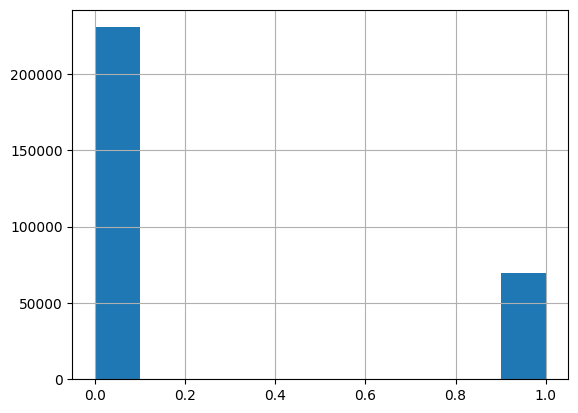

In [68]:
df.Left.hist()

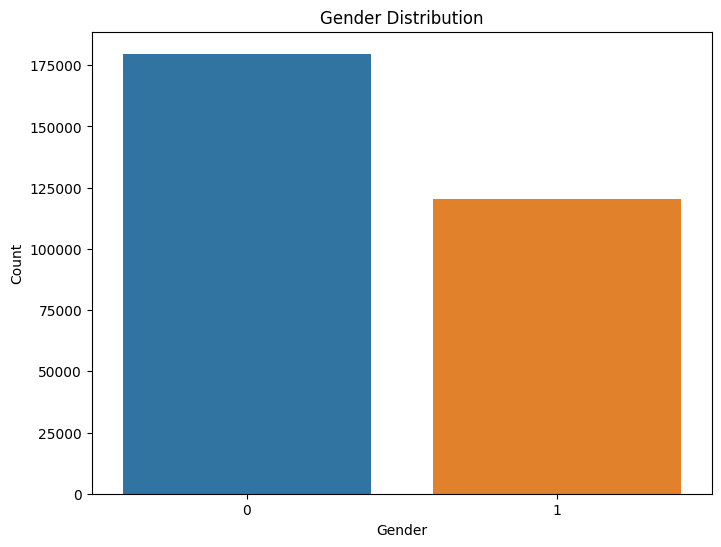

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

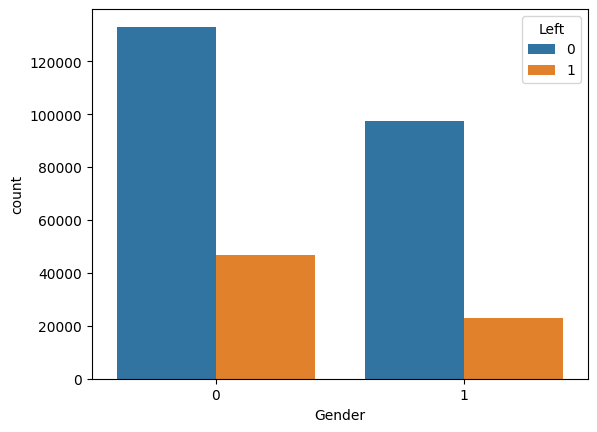

In [70]:
sns.countplot(data = df, x = 'Gender', hue = 'Left')

### Correlation Analysis

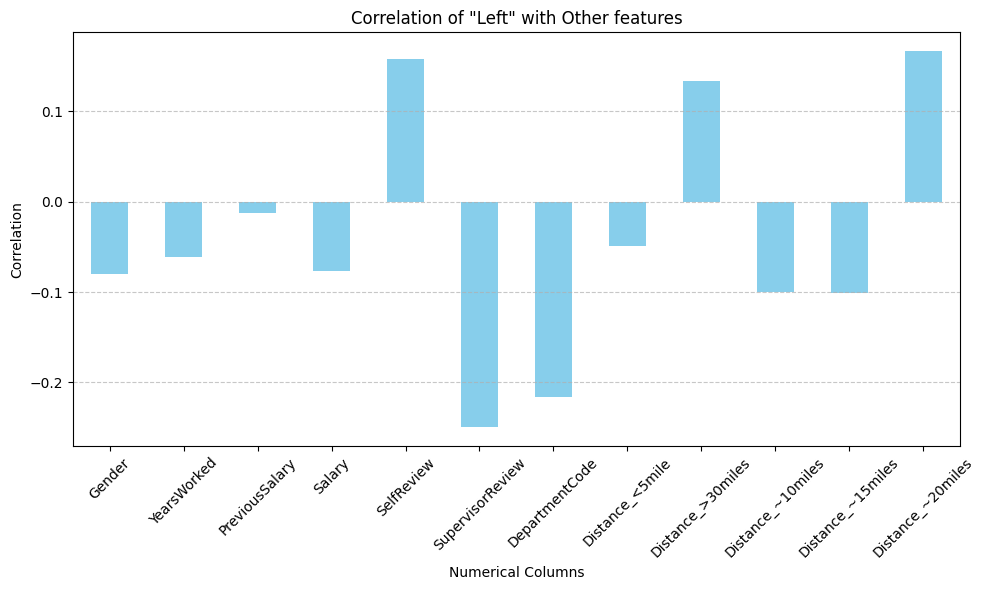

In [96]:
# Computing  the correlation between 'Left' column and other numerical columns
left_correlation = df.corr()['Left'].drop('Left')  # Dropped 'Left' itself as it will have a perfect correlation with itself

# Correlating 'Left' column with other numerical columns
plt.figure(figsize=(10, 6))
left_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of "Left" with Other features')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The graph above depicts the relationship between the target variable (Left) and the other features in the dataset. 

- Results shows that the features with the highest positive correlation with "Left" are:

SupervisorReview: 0.249545

DepartmentCode: 0.216110

Distance_~20miles: 0.166422

SelfReview: 0.157590

This suggests that higher supervisor review scores, certain department codes, employees working around 20 miles away, and higher self-review scores are positively correlated with an employee leaving the company.

On the other hand, features like Gender, Salary, YearsWorked, and Distance_<5mile have relatively lower correlations with "Left".



In [73]:
mat=df.corr()
target="Left"
y=mat[target].abs().sort_values(ascending=False)
y

Left                 1.000000
SupervisorReview     0.249545
DepartmentCode       0.216110
Distance_~20miles    0.166422
SelfReview           0.157590
Distance_>30miles    0.133284
Distance_~15miles    0.100904
Distance_~10miles    0.099742
Gender               0.080043
Salary               0.076938
YearsWorked          0.060786
Distance_<5mile      0.048805
PreviousSalary       0.012598
Name: Left, dtype: float64

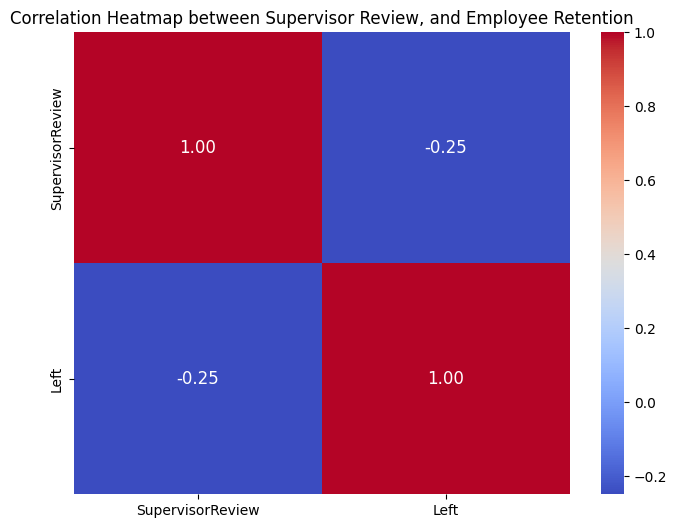

In [75]:
selected_columns = ['SupervisorReview', 'Left']
selected_data = df[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap between Supervisor Review, and Employee Retention')
plt.show()

1. The diagonal elements have a value of 1.
2. There is a correlation of 0.25 between the variables "SupervisorReview" and "Left".
3. There is a correlation of 0.25 between "Left" and "SupervisorReview", which is in the opposite direction.



In [62]:
# Summarizing categorical columns
print(df.describe(include='object'))

        Distance PreviousSalary  Salary
count     299735         300000  300000
unique         5             26      30
top     ~10miles            60K     61K
freq       90148          39790   37943


This summary provides insights into the distribution and characteristics of the categorical columns in the dataset.

In [76]:
# Employee attrition rate
attrition_rate = df['Left'].mean()
print("Attrition Rate: {:.2%}".format(attrition_rate))

Attrition Rate: 23.18%


The output Attrition Rate: 23.18% means that 23.18% of the employees in the dataset left the company.

In [77]:
# Compare average tenure between employees who left and those who stayed
tenure_comparison = df.groupby('Left')['YearsWorked'].mean()
print("Average Years Worked (Left vs. Stayed):\n", tenure_comparison)

Average Years Worked (Left vs. Stayed):
 Left
0    7.065494
1    6.796449
Name: YearsWorked, dtype: float64


The results shows that employees who stayed with the company had an average tenure of 7.065494 years, while employees who left had an average tenure of 6.796449 years.

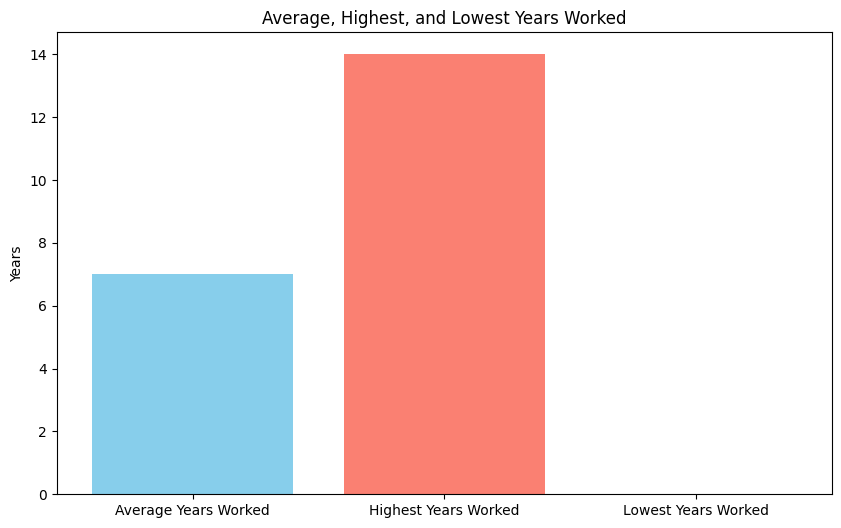

In [90]:
average_years_worked = df['YearsWorked'].mean()
highest_years_worked = df['YearsWorked'].max()
lowest_years_worked = df['YearsWorked'].min()

plt.figure(figsize=(10, 6))
plt.bar(['Average Years Worked', 'Highest Years Worked', 'Lowest Years Worked'], [average_years_worked, highest_years_worked, lowest_years_worked], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Years')
plt.title('Average, Highest, and Lowest Years Worked')
plt.show()

In [79]:
df['PreviousSalary'] = df['PreviousSalary'].astype(str)
df['Salary'] = df['Salary'].astype(str)

# Remove 'K' from 'PreviousSalary' and 'Salary' columns and convert to float
df['PreviousSalary'] = df['PreviousSalary'].str.replace('K', '').astype(float)
df['Salary'] = df['Salary'].str.replace('K', '').astype(float)


In [82]:
# Calculate the correlation matrix
correlation_matrix = df[['Gender', 'YearsWorked', 'PreviousSalary', 'Salary', 'SelfReview', 'SupervisorReview', 'DepartmentCode', 'Left', 'Distance_<5mile', 'Distance_>30miles', 'Distance_~10miles', 'Distance_~15miles', 'Distance_~20miles']].corr()


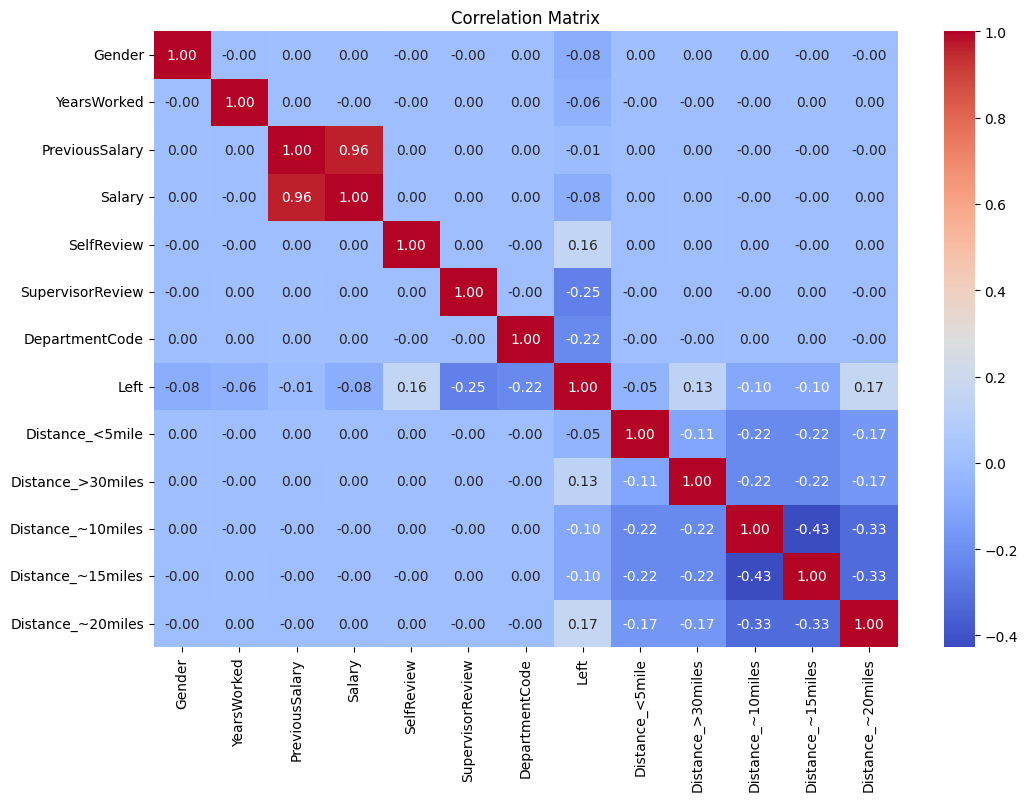

In [83]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [66]:
# Define features and target variable
X = df.drop('Left', axis=1)
y = df['Left']

In [67]:
# Selecting the target variable
target = 'Left'

# Getting the absolute correlation values with the target variable
corr_with_target = correlation_matrix[target].abs().sort_values(ascending=False)

# Displaying the top correlated features
print(corr_with_target)


Left                 1.000000
SupervisorReview     0.249545
DepartmentCode       0.216110
Distance_~20miles    0.166422
SelfReview           0.157590
Distance_>30miles    0.133284
Distance_~15miles    0.100904
Distance_~10miles    0.099742
Gender               0.080043
Salary               0.076938
YearsWorked          0.060786
Distance_<5mile      0.048805
PreviousSalary       0.012598
Name: Left, dtype: float64


### Pipeline Preprocessing 

In [29]:
# Define preprocessing steps for numerical and categorical features
numeric_features = ['YearsWorked', 'SelfReview', 'SupervisorReview']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [30]:
categorical_features = ['Distance', 'PreviousSalary', 'Salary']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RecordId', 'Gender', 'YearsWorked',
                                  'PreviousSalary', 'Salary', 'SelfReview',
                                  'SupervisorReview', 'DepartmentCode']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [6]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsWorked', 'SelfReview',
                                                   'SupervisorReview']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Distance', 'PreviousSalary',
                                                   'Salary'])])),
                ('classifier', RandomForestClassifier())])

### Train - Test Split

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessing_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RecordId', 'Gender', 'YearsWorked',
                                  'PreviousSalary', 'Salary', 'SelfReview',
                                  'SupervisorReview', 'DepartmentCode']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

### ML Model

In [16]:
# AdaBoost model pipeline
ada_model = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('clf', AdaBoostClassifier())
])

# Fit the model
ada_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'RecordId',
                                                   'Gender', 'YearsWorked',
                                                   'SelfReview',
                                                   'SupervisorReview',
                                                   'DepartmentCode']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Distance', 'PreviousSalary',
                                                   'Salary'])])),
                ('clf', AdaBoostClassifier())])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.93      0.88     46216
           1       0.60      0.34      0.43     13784

    accuracy                           0.80     60000
   macro avg       0.71      0.63      0.65     60000
weighted avg       0.77      0.80      0.77     60000



In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[43055  3161]
 [ 9136  4648]]


In [21]:
# Define the grid of parameters to search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1.0]
}

In [22]:
# Perform GridSearchCV
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'RecordId',
                                                                          'Gender',
                                                                          'YearsWorked',
                                                                          'SelfReview',
                                                                          'SupervisorReview',
                                                                          'DepartmentCode']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Distance',
                                                                          'PreviousSalary',
                                                                          'Salary'])])),
                                       ('clf', AdaBoostClassifier())]),
             param_grid={'clf__learning_rate': [0.01, 0.1, 1.0],
                         'clf__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_ada_model = grid_search.best_estimator_

Best Parameters: {'clf__learning_rate': 1.0, 'clf__n_estimators': 200}


In [29]:
ada_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(learning_rate=1.0, n_estimators=200, random_state=42))
])

In [30]:
ada_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'RecordId', 'Gender', 'YearsWorked', 'SelfReview',
       'SupervisorReview', 'DepartmentCode'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Distance', 'PreviousSalary', 'Salary'], dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(n_estimators=200, random_state=42))])

In [31]:
# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [32]:
print("Model Performance:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Model Performance:
Accuracy: 0.8037
Precision: 0.6232
Recall: 0.3685
F1-score: 0.4632


In [36]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])


In [37]:
xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'RecordId', 'Gender', 'YearsWorked', 'SelfReview',
       'SupervisorReview', 'DepartmentCode'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [38]:
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))


Model Performance:
Accuracy: 0.8779
Precision: 0.6953
Recall: 0.8339
F1-score: 0.7583


In [39]:
# Make predictions on train data
y_train_pred = xgb_model.predict(X_train)

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_train_pred))

# Make predictions on test data
y_test_pred = xgb_model.predict(X_test)

# Print classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92    184234
           1       0.71      0.85      0.78     55766

    accuracy                           0.89    240000
   macro avg       0.83      0.87      0.85    240000
weighted avg       0.90      0.89      0.89    240000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     46216
           1       0.70      0.83      0.76     13784

    accuracy                           0.88     60000
   macro avg       0.82      0.86      0.84     60000
weighted avg       0.89      0.88      0.88     60000



In [41]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5]
}

In [42]:
# Perform GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Unnamed: 0', 'RecordId', 'Gender', 'YearsWorked', 'SelfReview',
       'SupervisorReview', 'DepartmentCode'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Simple...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1.0],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_child_weight': [1, 3, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [43]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_xgb_model = grid_search.best_estimator_

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 200}


In [44]:
# Defining the XGBoost model with the best parameters
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=7, min_child_weight=3, random_state=42)

In [46]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model with the best parameters
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=7, min_child_weight=3, random_state=42)

In [47]:
# Creating a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb_model)])

In [48]:
# Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'RecordId', 'Gender', 'YearsWorked', 'SelfReview',
       'SupervisorReview', 'DepartmentCode'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [55]:
from sklearn.metrics import classification_report

# Making the predictions
y_pred = clf.predict(X_test)


print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     46216
           1       0.70      0.83      0.76     13784

    accuracy                           0.88     60000
   macro avg       0.82      0.86      0.84     60000
weighted avg       0.89      0.88      0.88     60000



In [ ]:
# Display the correlation matrix
print(correlation_matrix).T

In [78]:
selected_features = [
    'SupervisorReview', 'DepartmentCode', 'Distance_~20miles',
    'SelfReview', 'Distance_>30miles', 'Distance_~15miles',
    'Distance_~10miles', 'Gender', 'Salary', 'YearsWorked'
]

In [79]:
# Define X (features) and y (target)
X = df[selected_features]
y = df['Left']


In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Initialize an XGBoost classifier with tuned hyperparameters
model = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=3,
    n_estimators=200
)

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
# Make predictions
y_pred = model.predict(X_test)

In [84]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89     46216
           1       0.64      0.58      0.61     13784

    accuracy                           0.83     60000
   macro avg       0.76      0.74      0.75     60000
weighted avg       0.82      0.83      0.82     60000



## Conclusion:

This project aimed to build machine learning models for predicting employee attrition using an employee departure dataset. After extensive data preprocessing and model evaluation, the XGBoost Classifier emerged as the best performer, achieving an F1-score of 0.76 on the test set with the full feature set. Further feature selection based on correlation analysis improved the model's interpretability while maintaining reasonable performance (F1-score of 0.61).

Key findings revealed an attrition rate of 23.18% and a shorter average tenure for employees who left compared to those who stayed. While the developed models demonstrated decent predictive capabilities, understanding the underlying reasons for employee departures is crucial for developing effective retention strategies.

This analysis lays the foundation for organizations to identify potential attrition risks and proactively address employee retention challenges, fostering a positive work environment and retaining valuable talent.